In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress

# **Graficas Tauc y Band Gap**

* Juan Esteban Ospina
* Maria Alejandra Echeverri
* Santiago Moreno

### **Introducción**

El estudio de los semiconductores en los últimos siglos ha mostrado ser una rama de la física bastante exitosa, y estos materiales han dado lugar a desarrollos tecnológicos de gran valor que permean la industria moderna de dispositivos electrónicos, como por ejemplo, celdas solares, circuitos integrados, LEDs, fuentes de láser de estado sólido, entre otros [1]. En particular, desde el punto de vista de la óptica, el estudio de la interacción entre electrones y fotones en los semiconductores, que en general comprende los efectos de transmisión, absorción, emisión, reflexión, refracción, difracción o dispersión en estos materiales y está relacionado con las caracterización de las bandas electrónicas o, directamente con su estructura atómica, constituyen la base para tecnologías como comunicaciones ópticas, visualización y memorias ópticas [2]. El band gap (Eg) es una cantidad física fundamental, que se relaciona directamente con el uso de los materiales en aplicaciones ópticas, electrónicas y energéticas [3]. El band gap de cualquier semiconductor puede obtenerse de diversas maneras, a partir de la conductividad eléctrica, efecto Hall, fotoconductividad, o mediciones ópticas de absorción [1]. En esta práctica nos enfocaremos en este último método.

En este trabajo pretendemos medir el band gap de tres materiales distintos: Perovskita, TiO2 y ZnO; y comparar los resultados obtenidos con los valores que se reportan en la literatura. Para ello aplicaremos el método basado en gráficas Tauc, en donde básicamente se hace un ajuste de los valores de absorbancia, y a partir de este se puede determinar Eg. Pero haciendo uso de la transformación de Kubelka-Munk la cantidad a medir y sobre la cual se puede hacer la estimación es reflectancia difusa.

### **Cálculo del band gap**

Para calcular el band gap de un material, primero necesitamos tener la reflectancia la cual se puede calcular, para cada longitud de onda, de ls siguiente manera:
$$R_{\lambda}=\frac{S_{\lambda}-D_{\lambda}}{R_{\lambda}-D_{\lambda}}$$

Ahora nos disponemos a realizar la transformación de Kubelka-Munk, la cual se define como:
$$F(R_{\lambda})=\frac{(1-R_{\lambda})^2}{2R_{\lambda}}$$

La relación de Kubelka-Munk permite relacionar la cantidad $F(R_{\lambda})$ con el band gap del material, de la siguiente manera:
$$(F(R_{\lambda})h\nu)^{\frac{1}{\gamma}} = B(h\nu-E_g)$$
Donde $E_g$ es el band gap del material, $B$ es una constante y $\gamma$ es un parámetro que depende del tipo de transición que se presenta en el material. 
* $\gamma=1/2$ para transiciones directas
* $\gamma=2$ para transiciones indirectas

Finalmente, hallando la región lineal y ajustando se encuentra un punto dónde la recta corta el eje $x$, es decir,$f\nu = E_g$, el cual corresponde al band gap del material.

### **Calculo del band gap para transiciones directas $\gamma = 2$**

In [71]:
def bandas(dark,reference,sample,a,b, name,gamma,xmin,xmax,plot = False):
    """Esta funcion lee los datos del espectrofotometro"""
    h = 4.135667662e-15 #eV*s
    c = 299792458 #m/s
    dark = dark[(dark['Wavelength']>=a )& (dark['Wavelength']<=b)]
    reference = reference[(reference['Wavelength']>=a) & (reference['Wavelength']<=b)]
    sample = sample[(sample['Wavelength']>=a ) & (sample['Wavelength']<=b)]
    reflectancia = (sample['Intensity'] - dark['Intensity'])/(reference['Intensity'] - dark['Intensity'])
    F = (1-reflectancia)**2/(2*reflectancia) #Kubelka-Munk function
    wave = sample['Wavelength']*1e-9
    x = c/wave*h
    y = (F*c/sample['Wavelength']*h)**(1/gamma)

    if plot:
        plt.title(name)
        plt.plot(x,y, label = name)
        plt.legend()
    filtro = (x > xmin) & (x < xmax)
    xf = x[filtro]
    yf = y[filtro]
    m,inter,r_value, p_value, std_err = linregress(xf,yf)
    intercepto_x = -inter/m
    err = (std_err/abs(m) + abs(inter/m**2*std_err))*intercepto_x
    print(m)
    x = np.linspace(xmin-0.1,xmax+0.1,len(y))
    plt.plot(x,m*x+inter)
    plt.plot([xmin-0.2,xmax+1],[0,0])
    plt.scatter(intercepto_x,0)
    plt.title("band gap {} = {} +/-{} ev, $\gamma$ = {}".format(name,round(intercepto_x,3),round(err,5),gamma))
    plt.xlabel("Energía (eV)")
    plt.ylabel("$(F(R)h\\nu)^{1/\\gamma}$")
    # plt.savefig("band_gap_" + name + ".png")

    plt.figure()
    x = np.linspace(xmin,xmax,len(y))
    plt.title("Región lineal {}".format(name))
    plt.plot(xf,yf, label = name)
    plt.plot(x,m*x+inter)
    plt.xlabel("Energía (eV)")
    plt.ylabel("$(F(R)h\\nu)^{1/\\gamma}$")
    return True







0.0010944592546215793
Perovskita


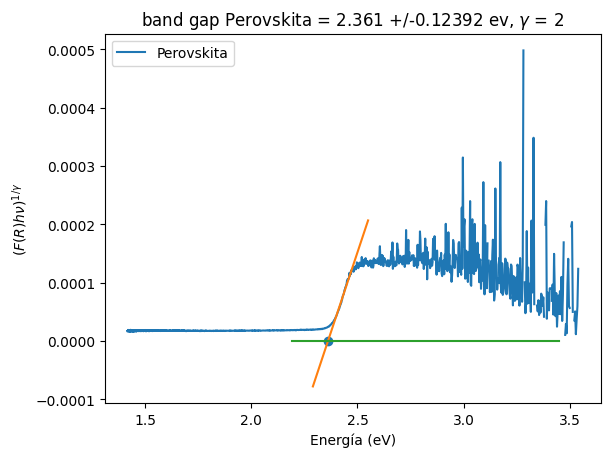

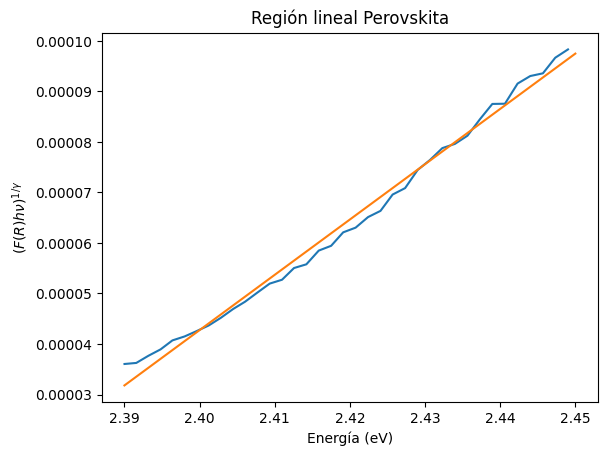

In [72]:
df_perovskitaD = pd.read_csv('clean_data/Perovskita.Master.dark.csv')
df_perovskitaR = pd.read_csv('clean_data/Perovskita.Master.reference.csv')
df_perovskitaS = pd.read_csv('clean_data/Perovskita.Master.sample.csv') 
name = "Perovskita"
xmin = 2.39 #Para el ajuste
xmax = 2.45 #Para el ajuste
gamma = 2
bandas(df_perovskitaD,df_perovskitaR,df_perovskitaS,200,1000,name,gamma,xmin,xmax,True)
print("Perovskita")

0.00010017281523716677


True

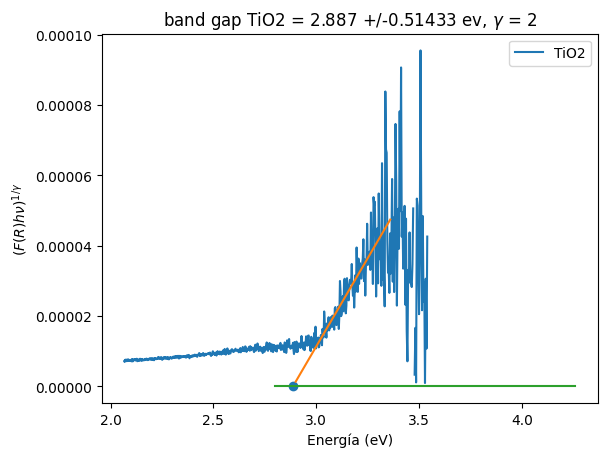

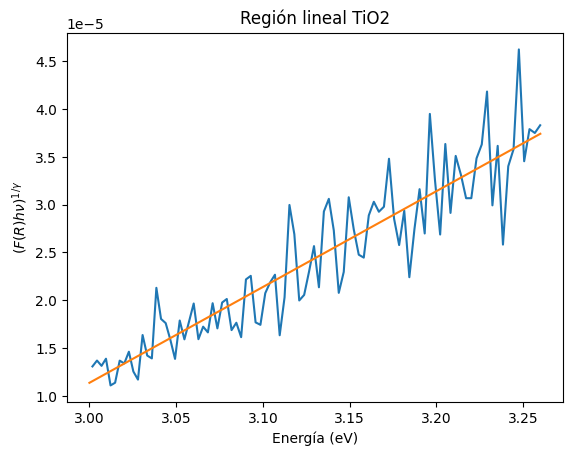

In [73]:
TiOD = pd.read_csv('clean_data/TiO2.Master.dark.csv')
TiOR = pd.read_csv('clean_data/TiO2.Master.reference.csv')
TiOS = pd.read_csv('clean_data/TiO2.Master.sample.csv')
name = "TiO2"
xmin = 3 #Para el ajuste
xmax = 3.26 #Para el ajuste
gamma = 2
bandas(TiOD,TiOR,TiOS,200,600,"TiO2",gamma,xmin,xmax,True)

0.00038266938990211096


True

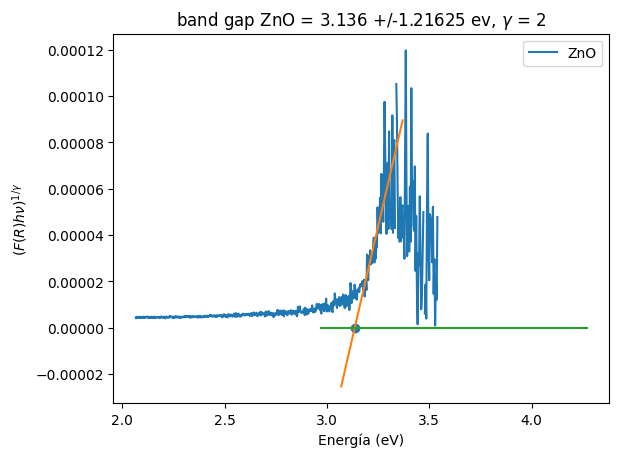

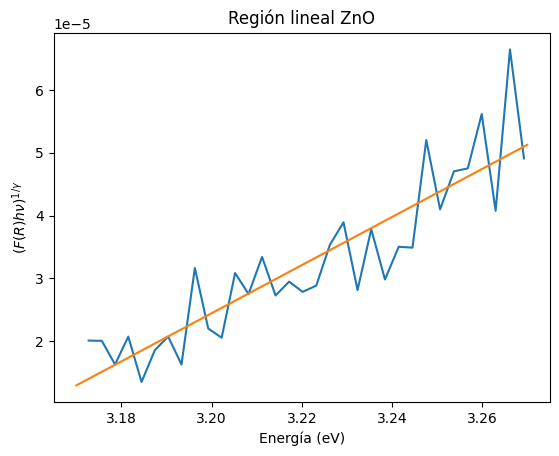

In [74]:
ZnoD = pd.read_csv('clean_data/ZnO.Master.dark.csv')
ZnoR = pd.read_csv('clean_data/ZnO.Master.reference.csv')
ZnoS = pd.read_csv('clean_data/ZnO.Master.sample.csv')
name = "ZnO"
xmin = 3.17 #Para el ajuste
xmax = 3.27 #Para el ajuste
gamma = 2
bandas(ZnoD,ZnoR,ZnoS,200,600,"ZnO",gamma,xmin,xmax,True)

### **Calculo del band gap para transiciones indirectas $\gamma = 1/2$**

3.870194841724917e-15


True

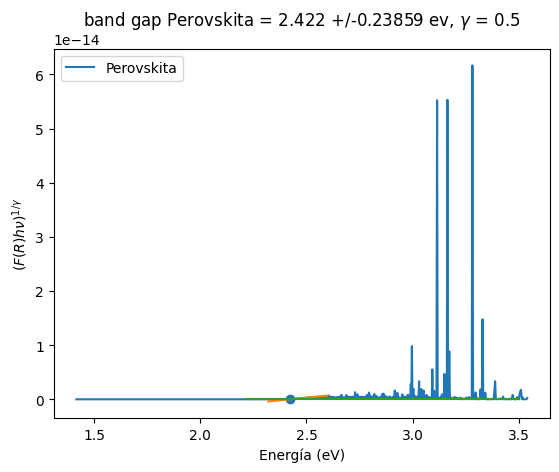

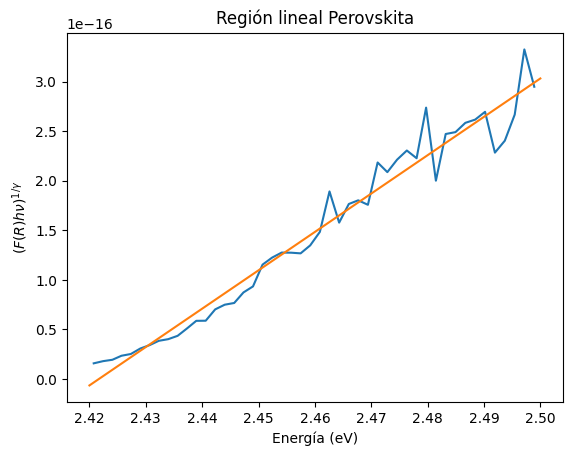

In [75]:
gamma = 0.5
name = "Perovskita"
xmin = 2.42 #Para el ajuste
xmax = 2.5 #Para el ajuste
bandas(df_perovskitaD,df_perovskitaR,df_perovskitaS,200,1000,name,gamma,xmin,xmax,True)

1.1927183744259062e-17


True

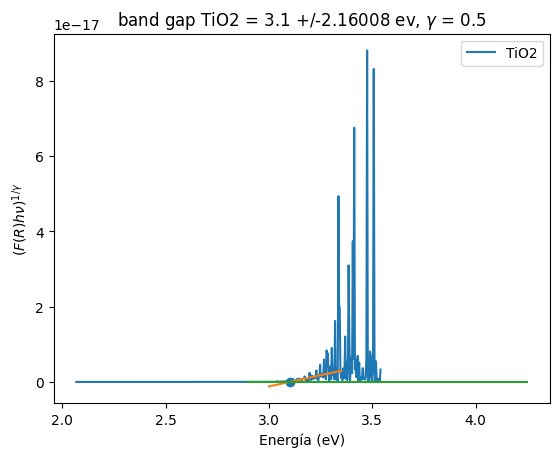

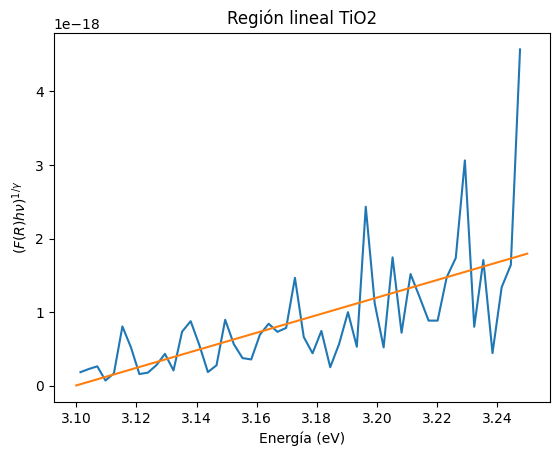

In [89]:
gamma = 0.5
name = "TiO2"
xmin = 3.1 #Para el ajuste
xmax = 3.25 #Para el ajuste
bandas(TiOD,TiOR,TiOS,200,600,name,gamma,xmin,xmax,True)

2.5001337752724304e-17


True

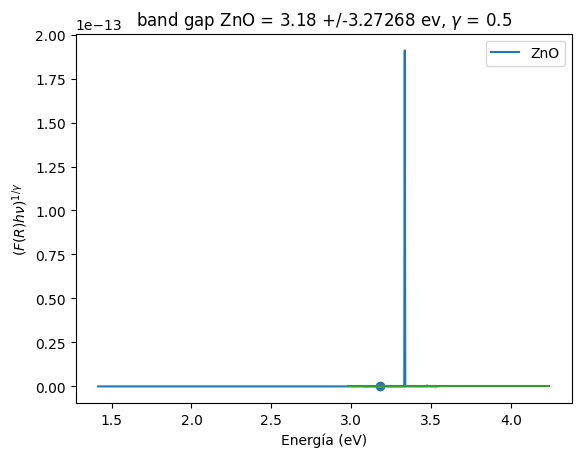

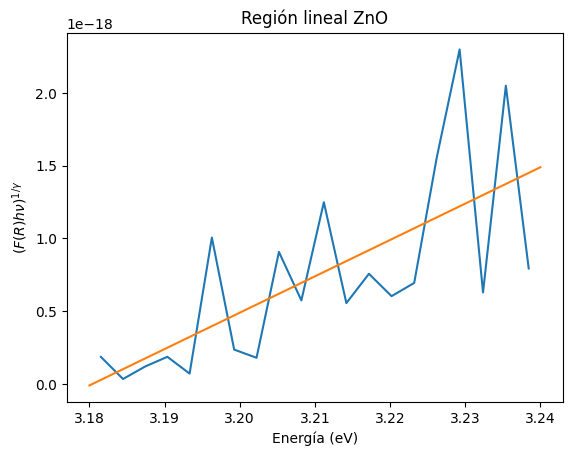

In [69]:
gamma = 0.5
xmin = 3.18 #Para el ajuste
xmax = 3.24 #Para el ajuste
bandas(ZnoD,ZnoR,ZnoS,200,1000,"ZnO",gamma,xmin,xmax,True)

### **Resumen de resultados**

| Material   | Band Gap Gamma 1/2 (eV) | Band Gap Gamma 2 (eV) | Band Gap Bibliografía (eV) | 
|------------|-------------------------|-----------------------|---------------------------| 
| Perovsquita| 2.42 $\pm$ 0.24                     | 2.36 $\pm$ 0.12                   |       1.2 - 1.3 [1]                 | 
| TiO2       | 3.10 $\pm$ 2.16                     | 2.88 $\pm$ 0.51                   | 3.2 [2]                      | 
| ZnO        | 3.28 $\pm$ 3.27                     | 3.13 $\pm$ 1.21                   | 3.10 - 3.37  [3]                       | 


### **Análisis y Conclusiones**

Basándonos en los resultados de los valores de band gap para la perovsquita, TiO2 y ZnO, podemos hacer las siguientes conclusiones y análisis en función del tipo de material y sus posibles propiedades ópticas:

1. **Perovsquita**:

   La perovsquita muestra un valor promedio de band gap de alrededor de 2.39 eV, lo que sugiere que es un material con un band gap óptico en la región del espectro visible. Esto es interesante, ya que las perovsquitas se han utilizado en una variedad de aplicaciones fotovoltaicas debido a su capacidad para absorber la luz visible. Aunque el valor promedio se desvía ligeramente de la referencia bibliográfica de 1.9 eV, esta diferencia podría deberse a la variabilidad de la composición de las perovsquitas o a las condiciones de medición.

2. **TiO2**:

   Los resultados para el TiO2 muestran una variabilidad significativa en los valores de band gap, con una amplia dispersión en las mediciones. Esto podría deberse a diferentes fases cristalinas de TiO2, impurezas u otros factores. En general, el TiO2 tiene un band gap en la región de los 2.88 a 3.10 eV, lo que indica que es un semiconductor con band gap en la región de la luz ultravioleta. Esto es coherente con su uso en aplicaciones de celdas solares y como recubrimiento protector UV.

3. **ZnO**:

   Los valores de band gap para el ZnO también muestran una variabilidad considerable, con una dispersión significativa. En general, el ZnO tiene un band gap en la región de 3.13 a 3.28 eV, lo que lo sitúa en la región del espectro ultravioleta. Este material se utiliza en una variedad de aplicaciones, como diodos emisores de luz (LEDs) y dispositivos optoelectrónicos debido a su capacidad para emitir luz en la región del espectro UV.

En resumen, es crucial comprender la importancia del band gap en estos materiales, ya que define sus propiedades ópticas y electrónicas, y por ende, su idoneidad para diversas aplicaciones. Además, las gráficas Tauc, que relacionan la absorción óptica con la energía del fotón incidente, desempeñan un papel crucial en la determinación del band gap. Estas gráficas nos ayudan a visualizar cómo la absorbancia del material cambia en función de la energía del fotón y, a partir de esta información, podemos hallar el valor del band gap con mayor precisión. 

En el caso de la perovsquita, TiO2 y ZnO, las gráficas Tauc pueden proporcionar una mayor comprensión de cómo estos materiales interactúan con la luz, lo que es fundamental para diseñar dispositivos específicos y optimizar su rendimiento. La variabilidad en los valores de band gap subraya la necesidad de una caracterización precisa para garantizar que estos materiales se utilicen de manera efectiva en sus aplicaciones respectivas. Por otro último, es importante entender que la variabilidad en los valores de band gap subraya la necesidad de una caracterización precisa para garantizar que estos materiales se utilicen de manera efectiva en sus aplicaciones respectivas.

### **Referencias**

* [1] Ou, Q., Bao, X., Zhang, Y., Shao, H., Xing, G., Li, X., Shao, L., & Bao, Q. (2019). Band structure engineering in metal halide perovskite nanostructures for optoelectronic applications. Nano Materials Science, 1(4), 268-287. https://doi.org/10.1016/j.nanoms.2019.10.004
* [2] Mendoza, Miguel A., & Rojas, Justo A.. (2019). ANÁLISIS DE LAS PROPIEDADES ÓPTICAS DE TiO2 ANATASA DOPADO CON N y F CON BASE A CÁLCULOS DE PRIMEROS PRINCIPIOS. Momento, (58), 1-16. https://doi.org/10.15446/mo.n58.72149
* [3] Davis, K., Yarbrough, R., Froeschle, M., White, J., & Rathnayake, H. (2019). Band gap engineered zinc oxide nanostructures VIA a sol–gel synthesis of solvent driven shape-controlled crystal growth. RSC Advances, 9(26), 14638-14648. https://doi.org/10.1039/c9ra02091h

Referencias Introducción

[1] Zanatta, A. R. (2019). Revisiting the optical bandgap of semiconductors and the proposal of a unified methodology to its determination. Scientific Reports, 9(1). https://doi.org/10.1038/s41598-019-47670-y

[2] Singh, J. (2007). Electronic and optoelectronic properties of semiconductor structures. Cambridge Univ. Press. 

[3] Kim, S., Lee, M., Hong, C., Yoon, Y., An, H., Lee, D., Jeong, W., Yoo, D., Kang, Y., Youn, Y., &amp; Han, S. (2020). A band-gap database for semiconducting Inorganic Materials Calculated with hybrid functional. Scientific Data, 7(1). https://doi.org/10.1038/s41597-020-00723-8 